## Data Dictionary <br>

`S.No.` : Serial Number <br>
`Name` : Name of the car which includes Brand name and Model name<br>
`Location` : The location in which the car is being sold or is available for purchase Cities<br>
`Year` : Manufacturing year of the car<br>
`Kilometers_driven` : The total kilometers driven in the car by the previous owner(s) in KM.<br>
`Fuel_Type` : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
`Transmission` : The type of transmission used by the car. (Automatic / Manual)<br>
`Owner` : Type of ownership<br>
`Mileage` : The standard mileage offered by the car company in kmpl or km/kg<br>
`Engine` : The displacement volume of the engine in CC.<br>
`Power` : The maximum power of the engine in bhp.<br>
`Seats` : The number of seats in the car.<br>
`New_Price` : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
`Price` : The price of the used car in INR Lakhs (1 Lakh = 100, 000)<br>

In [1]:
import pandas as pd
import numpy as np

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file) 
df=pd.read_csv("data_set.csv")

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# SECTION A: 20 MARKS

### 1. Explain the different encoding techniques.  (8 Marks)

* Label Encoding:We divide the data into 0 and 1 by looking at the data , using some analysis , this is imported as LabelEncoder
* Target Encoding - The categorical column is coded directly by th relation it shows with the target
* Frequency Encoding- This type of encoding is generally used when we have  too many categories in the data and here, we just assign the frequency of that particular category
* One Hot Encoding- This encoding is done when we have to give equal weightage to every category and it creates a new column for every category such that summ of all columns amount to the equal weightage given to each category.

### 2. Read the dataset and answer the questions below
  
 A) Display the categorical and Numerical columns? (1 Marks)
  
 B) Check if there any mismatch in the data values and the Data type of the column. Convert the columns in other datatype if required (2 Marks)

 C) Drop the reduntant / unwanted columns from the dataframe (2 Marks)

 D) Display the sub categories and their percentage for each of the categorical column (2 Marks)
 


In [2]:
## a part
df.head()

df.select_dtypes(include=np.number).columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [3]:
df.select_dtypes(include=object).columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [4]:
## b part

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df['Mileage']=df['Mileage'].str.split('k',expand=True)[0]

In [6]:
df['Engine']=df['Engine'].str.split('C',expand=True)[0]

In [7]:
df['Power']=df['Power'].str.split('b',expand=True)[0]

In [8]:
df['Mileage']=df['Mileage'].astype(float)

In [9]:
df['Engine']=df['Engine'].astype(float)

In [10]:
df.loc[df['Power']=='null ','Power']=0

In [11]:
df['Power']=df['Power'].astype(float)

In [12]:
df.loc[df['Power']==0,'Power']=np.NaN

In [13]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [14]:
## c part - lets remove the unwanted columns 

df.drop(columns=['S.No.'],axis=1,inplace=True)

In [15]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75


In [16]:
## d part
cat_cols=df.select_dtypes(include=object).columns

In [17]:

cat_cols


Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price'],
      dtype='object')

In [18]:
df.Name.value_counts()/df.shape[0]*100

Mahindra XUV500 W8 2WD                                     0.758307
Maruti Swift VDI                                           0.675583
Maruti Swift Dzire VDI                                     0.579071
Honda City 1.5 S MT                                        0.537709
Maruti Swift VDI BSIV                                      0.510134
                                                             ...   
Ford Figo 2015-2019 1.5D Trend MT                          0.013787
Chevrolet Beat LT Option                                   0.013787
Mahindra Xylo E9                                           0.013787
Mercedes-Benz New C-Class C 220CDIBE Avantgarde Command    0.013787
BMW 3 Series 328i Sport Line                               0.013787
Name: Name, Length: 2041, dtype: float64

In [19]:
df.Location.value_counts()/df.shape[0]*100

Mumbai        13.084241
Hyderabad     12.077761
Kochi         10.643872
Coimbatore    10.643872
Pune          10.547360
Delhi          9.099683
Kolkata        9.016958
Chennai        8.148352
Jaipur         6.879912
Bangalore      6.066455
Ahmedabad      3.791535
Name: Location, dtype: float64

In [20]:
df.Fuel_Type.value_counts()/df.shape[0]*100

Diesel      53.109058
Petrol      45.843099
CNG          0.854819
LPG          0.165449
Electric     0.027575
Name: Fuel_Type, dtype: float64

In [21]:
df.Transmission.value_counts()/df.shape[0]*100

Manual       71.749621
Automatic    28.250379
Name: Transmission, dtype: float64

In [22]:
df.Owner_Type.value_counts()/df.shape[0]*100

First             82.062595
Second            15.883083
Third              1.888874
Fourth & Above     0.165449
Name: Owner_Type, dtype: float64

In [23]:
df.New_Price.value_counts()/df.shape[0]*100

95.13 Lakh    0.082724
4.78 Lakh     0.082724
33.36 Lakh    0.082724
63.71 Lakh    0.082724
44.28 Lakh    0.068937
                ...   
14.22 Lakh    0.013787
12 Lakh       0.013787
9.97 Lakh     0.013787
12.57 Lakh    0.013787
11.39 Lakh    0.013787
Name: New_Price, Length: 625, dtype: float64

### 3. Read the App store dataset and answer the questions below

 A) Display the % of missing values in each column.(1 marks)
 
 B) Convert mileage,engine and power to numerical columns.(3 marks)

 C) Explain the statistical summary of the dataframe (1 Marks)
 
 

In [26]:
## a part - 

df.isnull().sum()/df.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [27]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [28]:
## b part

## done above, info clarly shows that datatypes were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [29]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


# SECTION B: 20 MARKS  (Explain with appropriate plots)

A) Find out the data where the mileage is zero and impute it with appropriate values and also find the highest mileage vehicle (3 Marks)
 
B) Find out the data where the seats are zero and impute it with appropriate values (2 Marks)  

C) Create two columns 'brand' and 'model' from the column 'name' and convert it to appropriate datatype (4 Marks)

D) Convert the repeated brand name to its appropriate brand names after careful observation (2 Marks)

E) Visualize the brand with the maximum vehicles sold (2 Marks) 

F) Which is the highest sold model ? (2 Marks)

G) Impute the missing values for 'Engine' , 'Power' , 'Mileage' and for the other numerical columns (5 Marks)




In [30]:
## a part

df.loc[df['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,NaN


In [31]:
import seaborn as sns
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187859,0.322463,-0.054693,0.013432,0.008216,0.305327
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.030164,0.090221,-0.011493
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.306593
Engine,-0.054693,0.094818,-0.593569,1.000000,0.859771,0.399262,0.658354
Power,0.013432,0.030164,-0.531771,0.859771,1.000000,0.095905,0.772566
Seats,0.008216,0.090221,-0.310632,0.399262,0.095905,1.000000,0.052225
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,1.000000


In [123]:
## year shows good relation so lets use it

In [32]:
df.groupby('Year')['Mileage'].mean()

Year
1996    14.100000
1998    14.900000
1999    15.150000
2000    15.434000
2001    10.900000
2002    10.833333
2003    14.645000
2004    13.082286
2005    13.228676
2006    14.598315
2007    14.584865
2008    15.324541
2009    15.396706
2010    16.398452
2011    16.835969
2012    17.998986
2013    18.504551
2014    18.766562
2015    19.166997
2016    19.547785
2017    19.575021
2018    19.331385
2019    17.956807
Name: Mileage, dtype: float64

In [33]:

df.loc[(df['Year']==1996)&(df['Mileage']==0),'Mileage']=14.1
df.loc[(df['Year']==1998)&(df['Mileage']==0),'Mileage']=14.9
df.loc[(df['Year']==1999)&(df['Mileage']==0),'Mileage']=15.15
df.loc[(df['Year']==2000)&(df['Mileage']==0),'Mileage']=15.43
df.loc[(df['Year']==2001)&(df['Mileage']==0),'Mileage']=10.9
df.loc[(df['Year']==2002)&(df['Mileage']==0),'Mileage']=10.8
df.loc[(df['Year']==2003)&(df['Mileage']==0),'Mileage']=14.6
df.loc[(df['Year']==2004)&(df['Mileage']==0),'Mileage']=13.0
df.loc[(df['Year']==2005)&(df['Mileage']==0),'Mileage']=13.22
df.loc[(df['Year']==2006)&(df['Mileage']==0),'Mileage']=14.59
df.loc[(df['Year']==2007)&(df['Mileage']==0),'Mileage']=14.58
df.loc[(df['Year']==2008)&(df['Mileage']==0),'Mileage']=15.32
df.loc[(df['Year']==2009)&(df['Mileage']==0),'Mileage']=15.39
df.loc[(df['Year']==2010)&(df['Mileage']==0),'Mileage']=16.39
df.loc[(df['Year']==2011)&(df['Mileage']==0),'Mileage']=16.83
df.loc[(df['Year']==2012)&(df['Mileage']==0),'Mileage']=17.88
df.loc[(df['Year']==2013)&(df['Mileage']==0),'Mileage']=18.5
df.loc[(df['Year']==2014)&(df['Mileage']==0),'Mileage']=18.76
df.loc[(df['Year']==2015)&(df['Mileage']==0),'Mileage']=19.16
df.loc[(df['Year']==2016)&(df['Mileage']==0),'Mileage']=19.54
df.loc[(df['Year']==2017)&(df['Mileage']==0),'Mileage']=19.57
df.loc[(df['Year']==2018)&(df['Mileage']==0),'Mileage']=19.33
df.loc[(df['Year']==2019)&(df['Mileage']==0),'Mileage']=17.95

In [35]:
df['Seats'].mode()


0    5.0
dtype: float64

In [124]:
## very less values are missing so lets use mode


In [36]:
## b part
 


df.loc[df['Seats']==0,'Seats']=5

In [37]:
df.loc[df['Seats']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [33]:
## c part

In [38]:
df['Brand']=df['Name'].str.split(' ',expand=True)[0]

In [39]:
df['Brand']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7253, dtype: object

In [40]:
df['Model']=df['Name'].str.split(' ',expand=True)[1]+' '+df['Name'].str.split(' ',expand=True)[2]

In [125]:
## used split and + operator to find the asked columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 850.1+ KB


In [57]:
## brand and model are both objects and should be objects so no need of data change

In [59]:
## d part

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New


In [42]:
df.Brand.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Force               3
ISUZU               3
Bentley             2
Isuzu               2
Smart               1
Lamborghini         1
Ambassador          1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [44]:
df.loc[df['Brand']=='ISUZU','Brand']='Isuzu' ## isizu was repeating

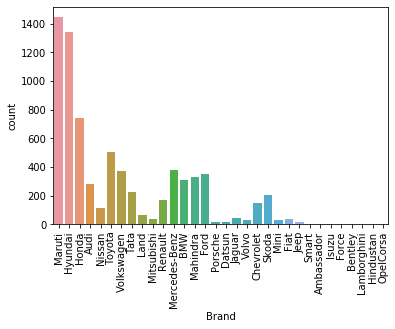

In [126]:
## e part

sns.countplot(df.Brand)
plt.xticks(rotation=90)

plt.show()

In [127]:
## maruti and hyundai are the most bought cars while imported cars fall well short

In [46]:
import matplotlib.pyplot as plt

In [48]:
## f part 

df.Model.value_counts()

## highest sold model is swift dzire

Swift Dzire      189
Grand i10        179
Wagon R          178
Innova 2.5       145
Verna 1.6        127
                ... 
Siena 1.2          1
F Type             1
Ignis 1.3          1
Linea Dynamic      1
Fusion Plus        1
Name: Model, Length: 726, dtype: int64

In [74]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187859,0.311326,-0.054693,0.013432,0.007871,0.305327
Kilometers_Driven,-0.187859,1.000000,-0.071682,0.094818,0.030164,0.091159,-0.011493
Mileage,0.311326,-0.071682,1.000000,-0.634613,-0.548425,-0.347992,-0.324054
Engine,-0.054693,0.094818,-0.634613,1.000000,0.859771,0.402715,0.658354
Power,0.013432,0.030164,-0.548425,0.859771,1.000000,0.095905,0.772566
Seats,0.007871,0.091159,-0.347992,0.402715,0.095905,1.000000,0.053199
Price,0.305327,-0.011493,-0.324054,0.658354,0.772566,0.053199,1.000000


In [49]:
## g part

df.isnull().sum()

## mileage has only 2 nulls so we should just put the mean
df['Mileage'].mean()

df.loc[df['Mileage'].isnull(),'Mileage']=18.31

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   1
(False, Brand)          0
dtype: int64

In [50]:
df['Engine'].mean()

1616.5734702372692

In [51]:
df.loc[df['Engine'].isnull(),'Engine']=1616.5

In [52]:
df['Power'].mean()

112.76521404351419

In [53]:
df.loc[df['Power'].isnull(),'Power']=112.7

In [54]:
df['Seats'].mode()

0    5.0
dtype: float64

In [55]:
df.loc[df['Seats'].isnull(),'Seats']=5

In [56]:
df['New_Price']=df['New_Price'].str.split('C',expand=True)[0]
df['New_Price']=df['New_Price'].str.split('c',expand=True)[0]
df['New_Price']=df['New_Price'].str.split('L',expand=True)[0]
df['New_Price']=df['New_Price'].str.split('l',expand=True)[0]

In [57]:
df['New_Price']=df['New_Price'].astype(np.number)

In [58]:
df['New_Price'].mean()

19.894324055666

In [59]:
df.loc[df['New_Price'].isnull(),'New_Price']=19.84

In [60]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1234
Brand                   0
Model                   1
dtype: int64

In [61]:
df['Price'].mean()

df.loc[df['Price'].isnull(),'Price']=9.47

In [128]:
## mean was the safest option as models had too many values and brand didnt show much promise too

# SECTION C: 30 MARKS  (Explain with appropriate plots)

A) Convert the fuel type into 'Diesel' , 'Petrol' and 'Other' (3 Marks)

B) Convert the seat column with seats above 5 as 'suv' , between 4 and 5 as 'Compact' and 2 as 'Sports'- Explain the distribution with boxplot (4 Marks)

C) Bin the locations based on states (3 Marks)

D) Explain the difference between Univariate , Bivariate and Multivariate analysis (8 Marks)

E) Mention the two kinds of target variables for predictive modeling. (2 Marks)

F) How does Price vary based on model Year ? (2 Marks)

F) Find out the maximum , average and median price based on the brands (2 Marks)

H) Treat the outliers for all the numerical variables (2 Marks)

I) Find out the correlation between numerical variables (2 Marks)

J) What are the business insights you can get from the plots?  (2 Marks)


In [107]:
## a part

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,"(False, Brand)"
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,19.84,1.75,Maruti,Wagon R,Isuzu
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,19.84,12.50,Hyundai,Creta 1.6,Isuzu
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V,Isuzu
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19.84,6.00,Maruti,Ertiga VDI,Isuzu
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19.84,17.74,Audi,A4 New,Isuzu


In [62]:
df.Fuel_Type.value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [63]:
def fuel(x):
    if x=='Diesel':
        return('Diesel')
    elif x=='Petrol':
        return('Petrol')
    else:
        return('Other')
    

In [64]:
df['Fuel_Type']=df['Fuel_Type'].apply(fuel)

In [65]:
df.Fuel_Type.value_counts()

Diesel    3852
Petrol    3325
Other       76
Name: Fuel_Type, dtype: int64

In [ ]:
##B) Convert the seat column with seats above 5 as 'suv' ,
##between 4 and 5 as 'Compact' and 2 as 'Sports'- 
##Explain the distribution with boxplot (4 Marks)

In [66]:
def chair(x):
    if x>5:
        return('SUV')
    elif x<5 and x>2:
        return('Compact')
    else:
        return('Sports')

In [68]:
df['Seats']=df['Seats'].apply(chair)

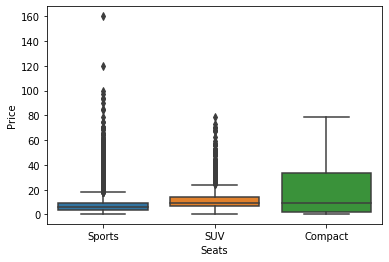

In [120]:
sns.boxplot(df.Seats,df.Price)

In [121]:
## as we can see that sports cars are pretty expensive , suv are less expensive , while compact
## being the cheapest
## but the trend reverses when we look at the amount of cars sold

In [70]:
## c part-

df.Location.value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [117]:
def state(x):
    if x=='Mumbai' or x=='Pune':
        return('Maharashtra')
    elif x=='Delhi':
        return('Delhi')
    elif x== 'Kochi' or x=='Coimbatore':
        return('Kerala')
    elif x=='Hyderabad':
        return('Telangana')
    elif x=='Kolkata':
        return('West Bengal')
    elif x=='Chennai':
        return('Tamil Nadu')
    elif x=='Jaipur':
        return('Rajasthan')
    elif x== 'Bengalore':
        return('Karnataka')
    else:
        return('Gujarat')

In [118]:
df['Location']=df.Location.apply(state)

In [119]:
df['Location']

0       Maharashtra
1       Maharashtra
2        Tamil Nadu
3        Tamil Nadu
4            Kerala
           ...     
7248      Telangana
7249    Maharashtra
7250    West Bengal
7251    Maharashtra
7252         Kerala
Name: Location, Length: 7253, dtype: object

In [74]:
## d part -

## uni variate

num_cols=df.select_dtypes(include=np.number).columns

In [75]:
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price',
       'Price'],
      dtype='object')

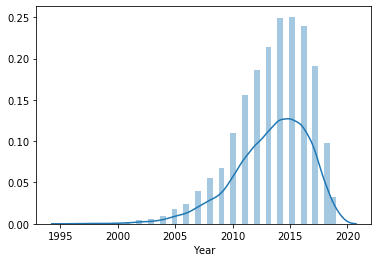

In [82]:
sns.distplot(df.Year)

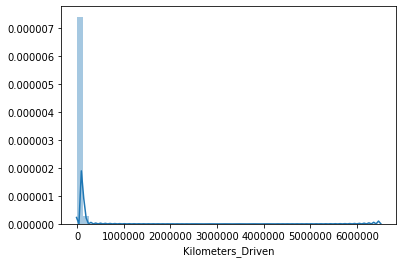

In [83]:
sns.distplot(df.Kilometers_Driven)

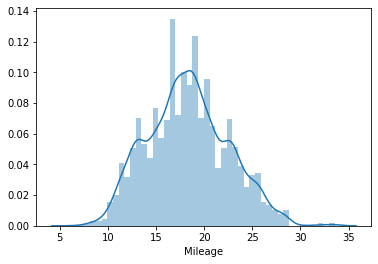

In [84]:
sns.distplot(df.Mileage)

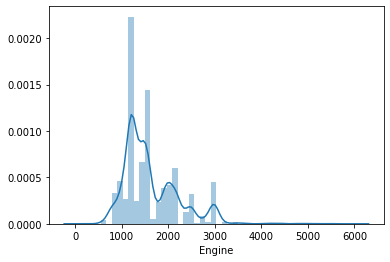

In [86]:
sns.distplot(df.Engine)

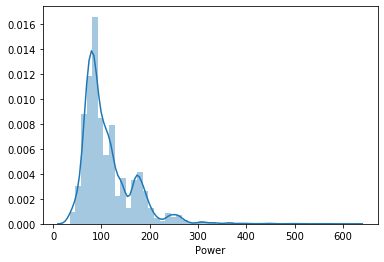

In [87]:
sns.distplot(df.Power)

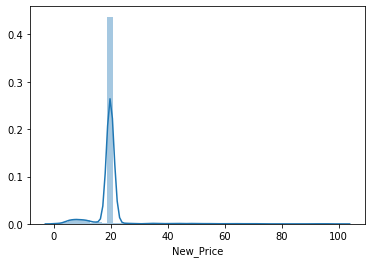

In [88]:
sns.distplot(df.New_Price)

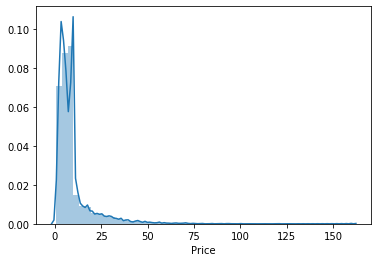

In [89]:
sns.distplot(df.Price)

In [90]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price'],
      dtype='object')

In [92]:
## sns.countplot(df.Name)  too many names

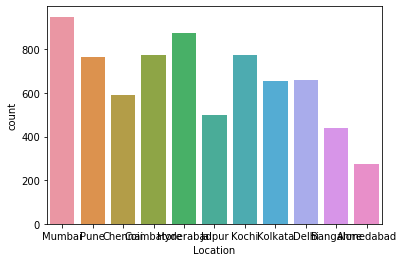

In [93]:
sns.countplot(df.Location)

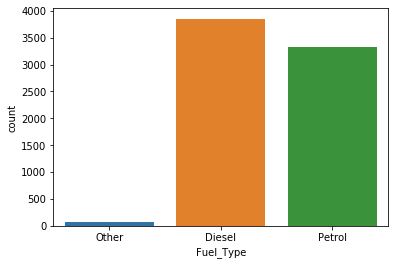

In [94]:
sns.countplot(df.Fuel_Type)

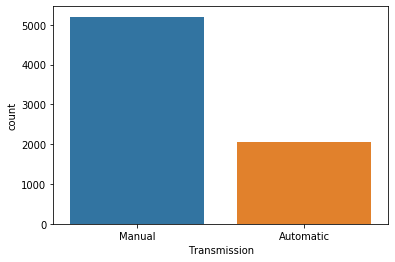

In [95]:
sns.countplot(df.Transmission)

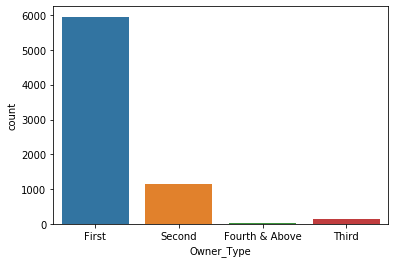

In [96]:
sns.countplot(df.Owner_Type)

## as we can see from the above uni variate analysis that we always have 2 types of columns , categorical and numerical: 
* so for categorical columns , we use countplot which is a bar graph of all the categories
* for numerical cols : we draw the dist or histogram which shows the spread of the numrical column as seen above

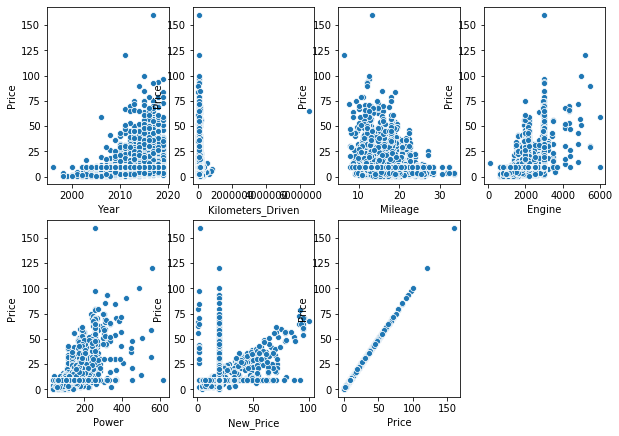

In [100]:
## bi variate
rows=4
columns=4
it=1
plt.figure(figsize=[10,15])

for i in num_cols:
    plt.subplot(rows,columns,it)
    sns.scatterplot(df[i],df['Price'])
    it=it+1
    
plt.show()

In [101]:
cat_cols=df.select_dtypes(include=object).columns

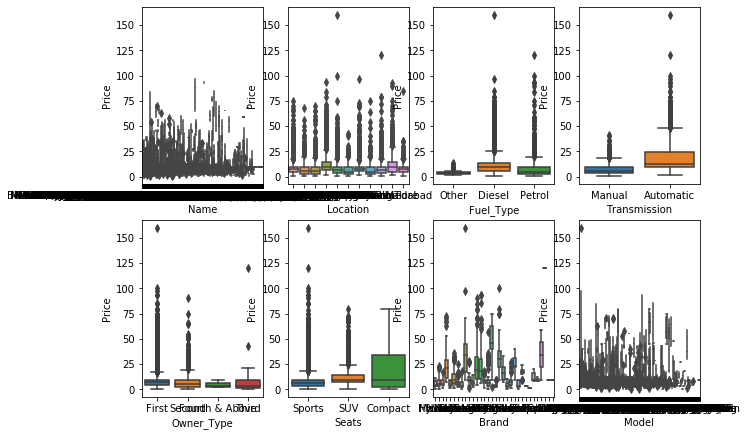

In [103]:
rows=4
columns=4
it=1
plt.figure(figsize=[10,15])

for i in cat_cols:
    plt.subplot(rows,columns,it)
    sns.boxplot(df[i],df['Price'])
    it=it+1
    
plt.show()

## we have done the bi variate analysis , had 2 types of columns too but here we have done the analysis with relation to the target variable

## differences in uni and bi - variate:

* uv is done for 1 feature while bi is done for 2 combined
* uv shows no insight with target variable but bi does it
* uv has one variable while bi has 2
* uv analysis cannot be done for complex vars but bi can be


E) Mention the two kinds of target variables for predictive modeling. (2 Marks)

F) How does Price vary based on model Year ? (2 Marks)

F) Find out the maximum , average and median price based on the brands (2 Marks)

H) Treat the outliers for all the numerical variables (2 Marks)

I) Find out the correlation between numerical variables (2 Marks)

J) What are the business insights you can get from the plots? (2 Marks)

In [104]:
## e part ( after a very long d part )

## the two types of target variables as discussed above too are categrical and numerical
## cat can be numerical too but they can be divided into categories based on various relations
## numerical columns can only be float or int

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

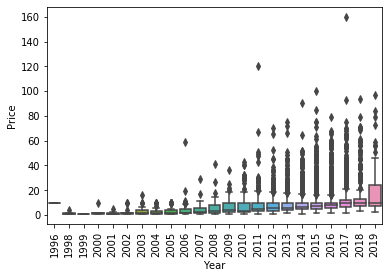

In [108]:
## f part

sns.boxplot(df.Year,df.Price)
plt.xticks(rotation=90)

In [109]:
## we can see that the price is increasing as the years are increasing

In [113]:
##  g part
pd.crosstab(df.Price,df.Brand).describe()

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Nissan,OpelCorsa,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,...,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,0.000728,0.207575,0.227240,0.001457,0.109978,0.012382,0.027677,0.002185,0.255645,0.000728,...,0.085215,0.000728,0.013838,0.123816,0.147123,0.000728,0.166060,0.369264,0.272396,0.020393
std,0.026988,1.434640,1.353944,0.038152,0.917276,0.149804,0.320518,0.060329,1.551184,0.026988,...,0.785728,0.026988,0.128733,0.818407,0.907645,0.026988,1.269782,2.720426,1.784719,0.234473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,49.000000,45.000000,1.000000,30.000000,4.000000,10.000000,2.000000,51.000000,1.000000,...,26.000000,1.000000,2.000000,25.000000,29.000000,1.000000,42.000000,96.000000,59.000000,7.000000


In [114]:
## we can see the avg min and max price for every brand above

In [115]:
## i part-

df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
Year,1.000000,-0.187859,0.311301,-0.054232,0.012898,-0.002814,0.279447
Kilometers_Driven,-0.187859,1.000000,-0.071682,0.094765,0.030068,0.001745,-0.011317
Mileage,0.311301,-0.071682,1.000000,-0.633282,-0.542704,-0.130171,-0.296420
Engine,-0.054232,0.094765,-0.633282,1.000000,0.853076,0.209655,0.604836
Power,0.012898,0.030068,-0.542704,0.853076,1.000000,0.276434,0.704231
New_Price,-0.002814,0.001745,-0.130171,0.209655,0.276434,1.000000,0.313953
Price,0.279447,-0.011317,-0.296420,0.604836,0.704231,0.313953,1.000000


In [116]:
## we can see the correlation between all the numerical variables above

## j part- 

* lets look at some business insights-
* Name-As soon as we split up the name in brand and model , we saw that some brands are expensive while some are cheaper, and their models also showed the same trend
* Location shows that wealthier states had more expensive cars
* fuel type showed that diesel and petrol cars are more expensive when compared to others
* Automatic cars are more expensive
* Newer cars are more expensive
* Better engine and more power cars are more expensive too


